In [1]:
import numpy as np
import matplotlib.pyplot as plt

In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tylerlum/.local/lib/python3.6/site-packages/matplotlib/

## Problem 6a

In [2]:
def fixed(n, t):
    A = [x for x in range(n)]
    fixed_array = [n]
    for _ in range(t):
        i, j = np.random.choice(n, size=(2), replace=False)
        iWasFixed, jWasFixed = (i == A[i]), (j == A[j])
        A[i], A[j] = A[j], A[i]
        iIsFixed, jIsFixed = (i == A[i]), (j == A[j])
        num_changed = int(iIsFixed) + int(jIsFixed) - int(iWasFixed) - int(jWasFixed)
        fixed_array.append(fixed_array[-1] + num_changed)
    return fixed_array

## Problem 6b

In [3]:
# Run 1 simulation and plot results
fixed_b = fixed(52, 200)

Text(0.5, 1.0, 'Number of fixed points after taking steps')

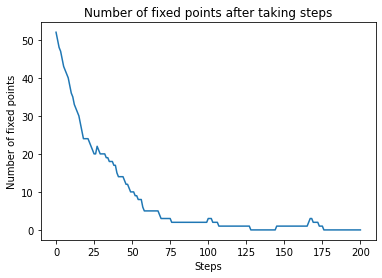

In [4]:
plt.plot(fixed_b)
plt.xlabel('Steps')
plt.ylabel('Number of fixed points')
plt.title('Number of fixed points after taking steps')

## Problem 6c

In [5]:
# Run N simulations and then plot the average across the simulations
N = 1000
fixed_list_c = [fixed(52, 200) for _ in range(N)]

In [6]:
fixed_avg_c = np.array(fixed_list_c).mean(axis=0)

Text(0.5, 1.0, 'Average number of fixed points after taking steps')

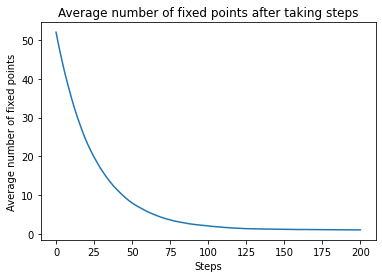

In [7]:
plt.plot(fixed_avg_c)
plt.xlabel('Steps')
plt.ylabel('Average number of fixed points')
plt.title('Average number of fixed points after taking steps')

## Problem 6d
The average number of fixed points after 100 steps and 200 steps is shown below. To check if there is a statistically significant difference between the 100 steps and the 200 steps distributions, we calculate the 95% confidence intervals of each distribution using the student t distribution. We find that the intervals do not overlap, which means that we can reject the null hypothesis that these are the same distribution. There is a statistically significant difference between the number of fixed points after 100 steps and after 200 steps.

In [8]:
# Calculate average number of fixed points after 100 steps and 200 steps
print(f"The average number of fixed points after 100 steps is {fixed_avg_c[100]}")
print(f"The average number of fixed points after 200 steps is {fixed_avg_c[200]}")

The average number of fixed points after 100 steps is 2.019
The average number of fixed points after 200 steps is 1.02


In [9]:
# Calculate 95% confidence interval for 100 steps and 200 steps
avg_100 = fixed_avg_c[100]
std_100 = np.array(fixed_list_c).std(axis=0, ddof=1)[100]
avg_200 = fixed_avg_c[200]
std_200 = np.array(fixed_list_c).std(axis=0, ddof=1)[200]
print(f"avg_100 = {avg_100}")
print(f"std_100 = {std_100}")
print(f"avg_200 = {avg_200}")
print(f"std_200 = {std_200}")

a = 1.984  # Value for t(99) student t distribution 95% confidence interval
confidence_interval_100 = avg_100 - a*std_100/np.sqrt(N), avg_100 + a*std_100/np.sqrt(N) 
confidence_interval_200 = avg_200 - a*std_200/np.sqrt(N), avg_200 + a*std_200/np.sqrt(N)
print(f"confidence_interval_100 = {confidence_interval_100}")
print(f"confidence_interval_200 = {confidence_interval_200}")

avg_100 = 2.019
std_100 = 1.3536880997746408
avg_200 = 1.02
std_200 = 0.9962894120648854
confidence_interval_100 = (1.934070165286818, 2.103929834713182)
confidence_interval_200 = (0.9574932119834321, 1.082506788016568)


Text(0.5, 1.0, 'Average number of fixed points (with error bars)')

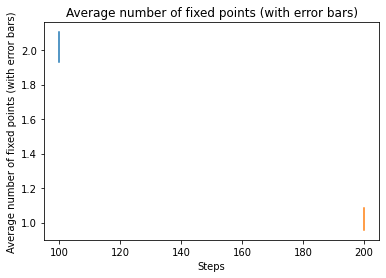

In [10]:
# Show that confidence intervals do not overlap, so there is a statistical difference
plt.plot([100, 100], confidence_interval_100)
plt.plot([200, 200], confidence_interval_200)
plt.xlabel('Steps')
plt.ylabel('Average number of fixed points (with error bars)')
plt.title('Average number of fixed points (with error bars)')

## Problem 7a

In [11]:
def tau(t, d):
    # Setup action space
    ACTION_SPACE = []
    for axis in range(d):
        for direction in [-1, 1]:
            action = np.array([0] * d)
            action[axis] = direction
            ACTION_SPACE.append(action)
    
    # Perform random walk until the origin is met or time limit is up
    S = np.array([0] * d)
    for i in range(1, t+1):
        action = ACTION_SPACE[np.random.choice(len(ACTION_SPACE))]
        S += action
        
        if np.all(S == 0):
            return i
    return np.inf

## Problem 7b

In [12]:
# Run 5000 simulations of the 1D case
N = 5000
r = np.array([tau(5000, 1) for _ in range(N)])
ns = np.array([n for n in range(1, N+1)])
a = np.array([np.count_nonzero(r > n)/N for n in ns])

In [13]:
# Calculate the best fit line
log_n = np.log(ns)
log_a = np.log(a)
p_1 = np.polyfit(log_n, log_a, 1)
fit_line_1 = p_1[1] + p_1[0]*log_n

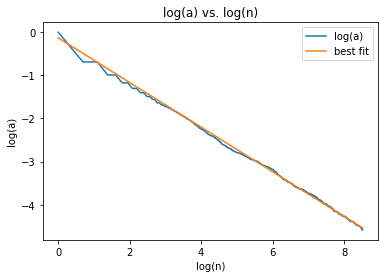

In [14]:
# Plot log(a) vs log(n)
plt.plot(log_n, log_a, label='log(a)')
plt.plot(log_n, fit_line_1, label='best fit')
plt.xlabel('log(n)')
plt.ylabel('log(a)')
plt.title('log(a) vs. log(n)')
plt.legend()

## Problem 7c

In [15]:
# Run 5000 simulations of the 2D case
N = 5000
R = np.array([tau(5000, 2) for _ in range(N)])
ns = np.array([n for n in range(1, N+1)])
A = np.array([np.count_nonzero(R > n)/N for n in ns])

In [16]:
# Calculate the best fit line
log_n = np.log(ns)
inverse_A = 1 / A
p_2 = np.polyfit(log_n, inverse_A, 1)
fit_line_2 = p_2[1] + p_2[0]*log_n

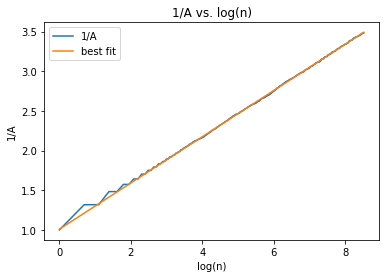

In [17]:
# Plot 1/A vs log(n)
plt.plot(log_n, inverse_A, label='1/A')
plt.plot(log_n, fit_line_2, label='best fit')
plt.xlabel('log(n)')
plt.ylabel('1/A')
plt.title('1/A vs. log(n)')
plt.legend()

## Problem 7d
We expect the value of the slope for d = 1 to be -1/2 and for d = 2 to be 1/pi. We compare the empirical slope and expected slope below, which shows that these values are very close.

In [18]:
print(f"Empirical slope for d = 1 is {p_1[0]}")
print(f"Expected slope for d = 1 is {-1/2}")
print(f"Empirical slope for d = 2 is {p_2[0]}")
print(f"Expected slope for d = 2 is {1/np.pi}")

Empirical slope for d = 1 is -0.5176427330794184
Expected slope for d = 1 is -0.5
Empirical slope for d = 2 is 0.29155349742169523
Expected slope for d = 2 is 0.3183098861837907
